<a href="https://colab.research.google.com/github/rheopy/rheofit/blob/master/data/Yielding%20and%20Flow%20in%20Adhesive%20and%20Nonadhesive%20Concentrated%20Emulsions/TC_analysis_fig5ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/rheopy/rheofit.git

  Cloning https://github.com/rheopy/rheofit.git to /tmp/pip-req-build-a2y4c108
  Running command git clone -q https://github.com/rheopy/rheofit.git /tmp/pip-req-build-a2y4c108
     |████████████████████████████████| 266kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 256kB 9.3MB/s 
  Created wheel for rheofit: filename=rheofit-0.1.0-cp36-none-any.whl size=9874 sha256=6b7d2339b6a5e692f167ecd87474f782fc64cc273b28c700271fd22f633cce44
  Stored in directory: /tmp/pip-ephem-wheel-cache-itje9ivp/wheels/a4/58/61/22fb357c158d287fa7e6b6a2b1cc7379d68d1d40fdbb8daf64
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=bc5f7c98bea058ff055da1831a8de5768584cbc8cedae4a027682c9e671daaa8
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl s

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
from IPython.display import Math

import rheofit
import pybroom as pb
import corner

import seaborn as sns
import io
from scipy.interpolate import UnivariateSpline
import numpy as np


In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [4]:
!git clone https://github.com/rheopy/rheofit.git

Cloning into 'rheofit'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 543 (delta 36), reused 0 (delta 0), pack-reused 471
Receiving objects: 100% (543/543), 3.28 MiB | 24.32 MiB/s, done.
Resolving deltas: 100% (316/316), done.


In [6]:
#check units - assuming SI

filename_fig2a='PhysRevLett.96.138302_fig5ab_Shear rate_Stress_s-1_Pa.csv'
xlabel=filename_fig2a.split('_')[2]
ylabel=filename_fig2a.split('_')[3]

sample_list=list(pd.read_csv(f'/content/rheofit/data/Yielding and Flow in Adhesive and Nonadhesive Concentrated Emulsions/{filename_fig2a}',nrows=1).columns)[::2]
data_table=pd.read_csv(f'/content/rheofit/data/Yielding and Flow in Adhesive and Nonadhesive Concentrated Emulsions/{filename_fig2a}',skiprows=1)
data_table

data_dict={}
for sample_index, sample_label in enumerate(sample_list):
  single_table=data_table.iloc[:,[sample_index*2,sample_index*2+1]]
  single_table.columns=[xlabel,ylabel]
  single_table.sort_values(by=xlabel,inplace=True)

  data_dict[sample_label]=single_table

# data interpolation example
# data=pd.read_excel('FC_0775.xlsx')
# int_y=UnivariateSpline(data['Shear rate'],data['Stress'],k=1)
# int_x=np.logspace(np.log10(min(data['Shear rate'])),np.log10(max(data['Shear rate'])),100)
# int_data=pd.DataFrame()
# int_data['Shear rate']=int_x
# int_data['Stress']=int_y(int_x)
# data_dict['FC_0775.xlsx']=data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
TC=rheofit.models.TC_model
HB=rheofit.models.HB_model

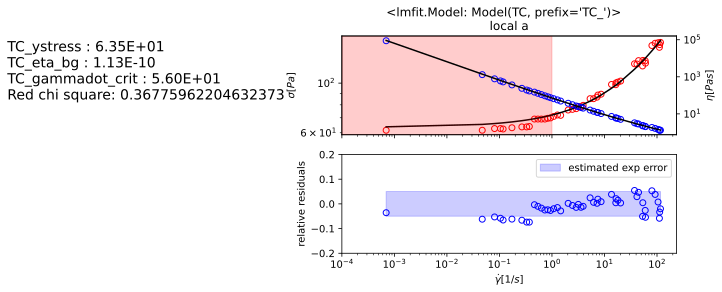

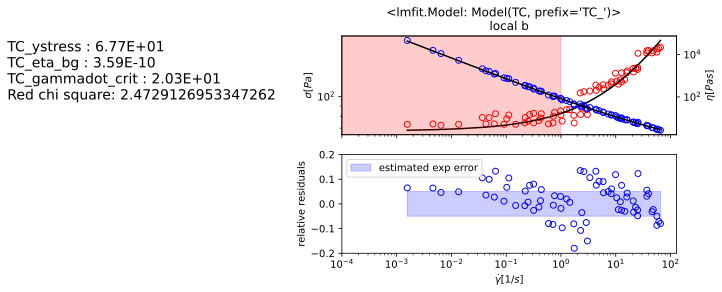

In [10]:
fit_res_dict={}

model = TC

min_shear_rate=1
max_shear_rate=10000

for filename, data in data_dict.items():
    mask=(data['Shear rate']>=min_shear_rate) & (data['Shear rate']<=max_shear_rate)    
    fit_res=model.fit(data['Stress'],x=data['Shear rate'],
                                     weights=1/(0.05*data[mask]['Stress']),
                                     nan_policy='omit')
    fit_res_dict[filename]=fit_res
    
for filename,fit_res in fit_res_dict.items():
    rheofit.visualization.plot_fit_res(fit_res, show_par_values=True);
    plt.title(filename)
    
    plt.axvspan(0.0001,min_shear_rate,color='red',alpha=0.2)
    plt.xlim(0.0001)  



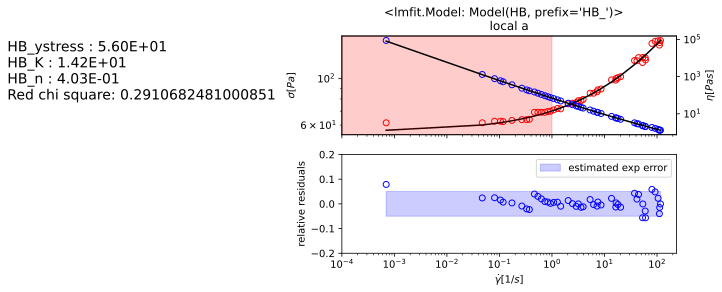

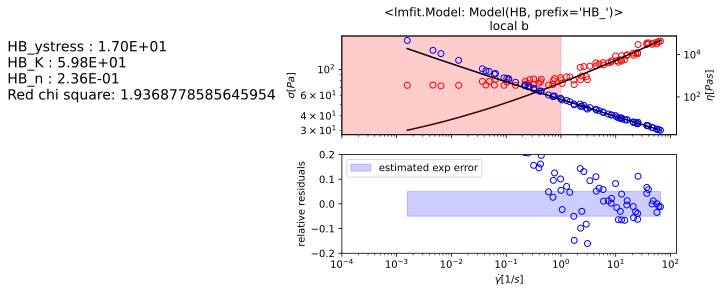

In [12]:
fit_res_dict={}

model = HB

min_shear_rate=1

max_shear_rate=10000

for filename, data in data_dict.items():
    mask=(data['Shear rate']>=min_shear_rate) & (data['Shear rate']<=max_shear_rate)    
    fit_res=model.fit(data['Stress'],x=data['Shear rate'],
                                     weights=1/(0.05*data[mask]['Stress']),
                                     nan_policy='omit')
    fit_res_dict[filename]=fit_res
    
for filename,fit_res in fit_res_dict.items():
    rheofit.visualization.plot_fit_res(fit_res, show_par_values=True);
    plt.title(filename)

    plt.axvspan(0.0001,min_shear_rate,color='red',alpha=0.2)
    plt.xlim(0.0001)  